<div style="display: block; width: 100%; height: 120px;">

<p style="float: left;">
    <span style="font-weight: bold; line-height: 24px; font-size: 16px;">
        DIGHUM160 - Critical Digital Humanities
        <br />
        Digital Hermeneutics 2019
    </span>
    <br >
    <span style="line-height: 22x; font-size: 14x; margin-top: 10px;">
        Week 1 exercises: ADVANCED <br />
        Created by Tom van Nuenen (tom.van_nuenen@kcl.ac.uk)
    </span>
</p>

This notebook will involve some word embeddings in SpaCy; you be will able to run some of your own analyses using Reddit data. First, let's download Spacy's language model.

In [10]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [41]:
import pandas as pd

import spacy

import en_core_web_lg
nlp = en_core_web_lg.load()

from glob import glob
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import json
from mpl_toolkits.mplot3d import Axes3D, proj3d #???
from numpy import dot
from numpy.linalg import norm
%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,8)

# Word Vector Similarity

SpaCy can generate objects from a few expressions. These objects contain a lot of inferred information about words and their relations. For instance, the `.vector` is an average of the word vectors in the document, where each word vector comes from pre-trained model (the Stanford GloVe vectors. We can compare individual words or slices/spans using the `.similarity()` method.

In [33]:
apple = nlp('apple')
pear = nlp('pear')
trash = nlp('trash')

In [34]:
apple.similarity(trash)

0.19166903803341856

In [35]:
apple.similarity(pear)

0.6126545139688148

Note that you can also create documents from "spans" (multiple words). Try it out!

In [39]:
doc = nlp("I enjoy juicy apples. Almost as much as really tasty pears.")

# Create spans for "rock music" and "distorted guitars"
span1 = nlp('juicy apples')
span2 = nlp('really tasty pears')

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

0.8070066344884659


# Analogies (i.e. Linear Algebra)

In fact, using our custom similarity function above is probably the easiest way to do word2vec-style vector arithmetic (linear algebra). What will we get if we subtract "European swallow" from "African swallow"? 

In [ ]:
swallowArithmetic = (africanSwallow.vector - europeanSwallow.vector)

Say we want to find all words with vectors that are most similar to our vector. SpaCy can't do this out of the box, however. We need to create a function that will go through all the possible words (all the words in `nlp.vocab`) and compares them.

In [42]:
def most_similar(word, topn=5):
  word = nlp.vocab[str(word)]
  queries = [
      w for w in word.vocab 
      if w.is_lower == word.is_lower and w.prob >= -15 and np.count_nonzero(w.vector)]
  by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
  return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]

most_similar("dog", topn=3)

[('dogs', 0.8835931), ('puppy', 0.85852146), ('pet', 0.8057451)]

# Similarity 

We can also treat individual words as "categorical" documents. If we put them in the same vector space as the other documents, we can infer how similar that word is to the document. Let's use four words representing certain emotions.

In [59]:
emo_docs = [nlp(w) for w in ['happiness', 'sadness', 'fear', 'anger']]
def which_emo(word):
    doc = nlp(word)
    return {emo: doc.similarity(emo) for emo in emo_docs}

In [60]:
which_emo('anxious')

{anger: 0.5060190165386692,
 fear: 0.5910236887244257,
 happiness: 0.39848962936593835,
 sadness: 0.48553374830690316}

In [65]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

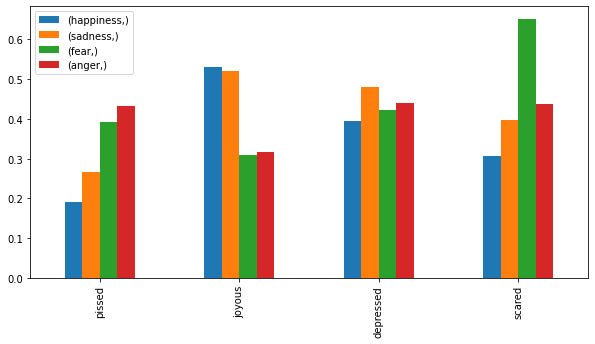

In [66]:
emo_words = 'pissed joyous depressed scared'.split()
pd.DataFrame([which_emo(w) for w in emo_words], index=emo_words).plot(kind='bar')

Not everything is intuitive as you can see. This is why it's always best to train your own vector space based on your own data..

# Using SpaCy with Reddit

Your turn. I'm linking to a CSV dataset for Reddit community The Red Pill (which was banned from reddit - currently found at https://www.trp.red/feed/all. You can download it using the Google Drive API. 

Using Pandas dataframe and SpaCy, have a look at some patterns in the data. Using SpaCy, try to find out what the most-similar words related to men and women look like. Try to render some simple visualisations of this as well.

In [70]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [71]:
downloaded = drive.CreateFile({'id':"1t2VY0gy8Smcmy5Ss5WAod36qY9RGE6qc"})   
downloaded.GetContentFile('TRP-submissions.csv')

In [73]:
df = pd.read_csv("TRP-submissions.csv", lineterminator='\n')

In [ ]:
# Let's go!